In [184]:
def activation_sigmoid(z):
    return np.power((1 + np.exp(-z)) ,-1)

In [185]:
def activation_tanh(z):
    return np.tanh(z)

In [252]:
#Cross Entrophy
def compute_cost(a,Y):
    cost = -(Y*np.log(a) + (1 - Y)*np.log(1-a))
    cost = np.mean(cost)
    return cost

In [253]:
def layer_sizes(X,Y,n_h = 4):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer
    m   = X.shape[1]
    return (n_x,n_h,n_y,m)

In [188]:
def initialize_with_parameters(n_x,n_h,n_y,seed =1):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(seed) # we set up a seed so that your output 
    #matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h,n_x) *0.01 
    b1 = np.random.randn(n_h,1)   *0.01
    W2 = np.random.randn(n_y,n_h) *0.01
    b2 = np.random.randn(n_y,1)   *0.01
    #If condition is true = > next
    
    assert (W1.shape == (n_h,n_x))
    assert (b1.shape == (n_h,1))
    assert (W2.shape == (n_y,n_h))
    assert (b2.shape == (n_y,1))
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    return params

In [189]:
def forward_propagation(params,X):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters 
    (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)    
    Z1 = W1 @ X  + b1
    A1 = activation_tanh(Z1)
    Z2 = W2 @ A1 + b2
    A2 = activation_sigmoid(Z2) 
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    assert(A2.shape == (1,X.shape[1]))
    return A2,cache

In [190]:
def backward_propagation(params,cache,X,Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with 
    respect to different parameters
    """
    n_x,n_h,n_y,m = layer_sizes(X,Y)
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = params["W1"]
    W2 = params["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2
    
    dZ2 = A2 - Y 
    dW2 = 1/m * (dZ2 @ A1.T)
    db2 = 1/m * np.sum(dZ2,axis =1,keepdims = True)
    dZ1 = np.matmul(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m * (dZ1 @ X.T)
    db1 = 1/m * np.sum(dZ1,axis =1,keepdims = True)
    
    grads = {"dW2": dW2,
             "db2": db2,
             "dW1": dW1,
             "db1": db1}
    
    return grads

In [191]:
def propagate(params,X,Y):
    
    A2,cache = forward_propagation(params,X)
    
    grads = backward_propagation(params,cache,X,Y)
    
    cost = compute_cost(A2,Y)
    
    return grads, cost

In [192]:
def update_parameters(params,grads,learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter gradient decent
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    return params

In [193]:
def optimize(params,X,Y,num_iterations,learning_rate,print_cost = False):
    
    costs = []
    
    for i in range(0,num_iterations):
        
        grads,cost = propagate(params,X,Y)
        
        params = update_parameters(params,grads,learning_rate)
        
        if i % 500 == 0:
            costs.append(cost)
            if print_cost :
                print("Cost after iteration %i: %f" %(i,cost))
    
    return params,grads,costs

In [194]:
def predict(params,X,accept_rate =0.5):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    A2,cache = forward_propagation(params,X) 
    
    Y_prediction = np.zeros(A2.shape)
    
    #Y_prediction = (A2 > accept_rate)
    
    for i in range (A2.shape[1]):
        if A2[0,i] > accept_rate:
            Y_prediction[0,i] =1
        else:
            Y_prediction[0,i] =0
    
    #assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [195]:
def nn_model(X_train,Y_train,X_dev,Y_dev,n_h,num_iterations = 10000,learning_rate = 0.5,print_cost = False):
    """
    Arguments:
    X_train -- dataset of shape (2, number of examples)
    Y_train -- labels of shape (1, number of examples)
    X_dev -- dataset of shape (2, number of examples)
    Y_dev -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    n_x,n_h,n_y,m = layer_sizes(X_train,Y_train,n_h)
    
    params = initialize_with_parameters(n_x,n_h,n_y,seed = 1)
    
    params, grads, costs = optimize(params,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    Y_train_prediction = predict(params,X_train,accept_rate =0.5)
    
    Y_dev_prediction = predict(params,X_dev,accept_rate =0.5)
    
    accuracy_train = 100 - np.mean(np.abs(Y_train_prediction - Y_train))* 100
    
    accuracy_dev =  100 - np.mean(np.abs(Y_dev_prediction - Y_dev)) * 100
    
    print("Accuracy Train: {}".format(accuracy_train))
    
    print("Accuracy Dev: {}".format(accuracy_dev))
    
    d = {"costs"             : costs,
         "accuracy_train"    : accuracy_train,
         "accuracy_dev"      : accuracy_dev,
         "parameters"        : params,
         "learning_rate"     : learning_rate,
         "num_interations"   : num_iterations
          }
        
    return d

In [196]:
def process_image(my_image,base_size = (64,64)):
    my_image = my_image.resize(base_size,Image.BICUBIC)   
    plt.imshow(my_image)
    X_new = np.array(my_image)
    X_new = X_new.ravel() 
    X_new = X_new.reshape(X_new.shape[0],1)    
    return X_new

## TRAIN/DEV/TEST

. No Dev Train/Test : 70%/30%

. From 100,1000,10000 Train/Dev/Test : 60%/20%/20%

. From 1000000 Train/Dev/Test : 98%/1%/1%

. From 1000000 Train/Dev/Test : 99.5%/0.5%/0.5%


## BASIC RECIPE

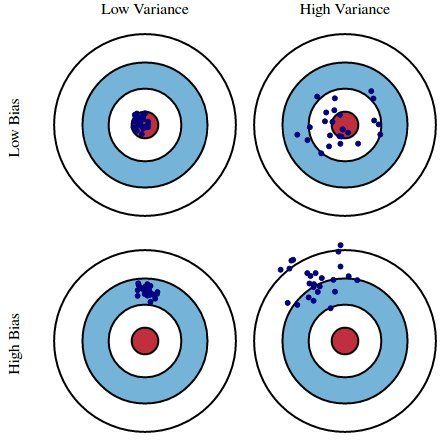

(train_error  =  0.5 % ) & (dev_error = 1 %) => Ok =>  Low bias, Low variance 

(train_error  =  1 % ) & (dev_error = 11 %) =>  Overfitting => Not generalize well => High Variance

(train_error  =  15 % ) & (dev_error = 16 %) => big train_error => Underfitting => High Bias

(train_error  =  15 % ) & (dev_error = 30 %) => big train_error,bigger dev_error => High Variance + High Bias

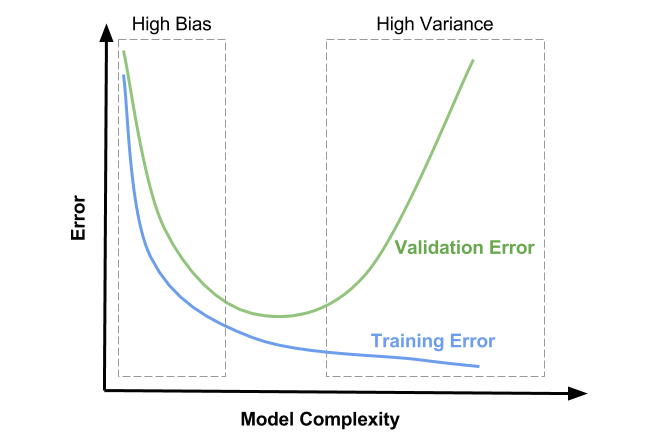

#### STEP 1 : HIGH VARIANCE  ( DEV_ERROR > ACCEPT_DEV_ERROR ) => OVERFITTING
  . MORE DATA
  
  . REGULAZTION 
  
#### STEP 2 : HIGH BIAS  ( TRAIN_ERROR > ACCEPT_TRAIN_ERROR ) => UNDERFITTING
  . BIGGER NETWORK
  
  . TRAIN LONGER


## REGULAZATION MENTHOD (REDUCE OVERFITTING)

### 1/ WEIGHT DECAY

### 2/ DROP OUT

### 3/ DATA AUGMENTATION

### 4/ EARLY STOPPING

### 5/ WEIGHT CONSTRAINS


## BATCH NORMAL MENTHOD (SPEED UP) 

In [197]:
def calc_train_error(X_train,Y_train,params):
    Y_train_prediction = predict(params,X_train,accept_rate =0.5)
    mse_train = np.mean((Y_train - Y_train_prediction)**2)
    rmse_train = np.sqrt(mse_train) * 100
    return Y_train_prediction,rmse_train

def calc_test_error(X_test,Y_test,params):
    Y_test_prediction = predict(params,X_test,accept_rate =0.5)
    mse_test = np.mean((Y_test - Y_test_prediction)**2)
    rmse_test = np.sqrt(mse_test) * 100
    return Y_test_prediction,rmse_test

def calc_metrics(X_train,Y_train,X_test,Y_test,params,train_accept,valid_accept,diagnostic):
    Y_train_prediction,train_error = calc_train_error(X_train,Y_train,params)
    Y_test_prediction,valid_error = calc_test_error(X_test,Y_test,params)
    
    if diagnostic:
        if valid_error > valid_accept:
            if train_error > train_accept:
                print("High Variance and High Bias" + \
                      "\n" + "More Data and regulazation for high variance" +
                      "\n" + "Bigger Network")
            else:  print("High Variance " + \
                  "\n" + "More Data and regulazation for high variance")
        else:
            if train_error > train_accept:
                print("High Bias" + "\n" + "Bigger Network")
            else:  print("Low Variance and Low Bias => O.K ")
                
    return Y_train_prediction,train_error,Y_test_prediction,valid_error

In [198]:
def n_model(X_train,Y_train,X_dev,Y_dev,n_h,num_iteration = 1000,learning_rate = 0.5,print_cost = False,train_accept = 10,valid_accept = 15,diagnostic = False):

    n_x,n_h,n_y,m = layer_sizes(X_train,Y_train,n_h)
    
    params = initialize_with_parameters(n_x,n_h,n_y,seed = 1)
    
    params, grads, costs = optimize(params,X_train,Y_train,num_iteration,learning_rate,print_cost)
    
    Y_train_prediction,train_error,Y_test_prediction,valid_error = calc_metrics(X_train,Y_train,X_dev,Y_dev,params,train_accept,valid_accept,diagnostic)
    
    print("train_error: " +str(train_error))
    
    print("valid_error: " +str(valid_error))
    
    d = {"costs"              : costs,
         "train_error"        : train_error,
         "valid_error"        : valid_error,
         "Y_train_prediction" : Y_train_prediction,
         "Y_test_prediction"  : Y_test_prediction,
         "parameters"         : params,
         "learning_rate"      : learning_rate,
         "num_interations"    : num_iteration
          }
        
    return d

In [199]:
def layer_early_stop(X_train,Y_train,X_dev,Y_dev,hidden_layer_sizes,num_iteration = 3000,learning_rate = 0.01,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True):
    valid_now = 0
    valid_old = 0 
    d_now = {}
    
    for i,n_h in enumerate(hidden_layer_sizes):        
        d_old = d_now
        d_now = n_model(X_train,Y_train,X_dev,Y_dev,n_h,num_iteration,learning_rate,print_cost,train_accept,valid_accept,diagnostic)
        valid_old = valid_now
        valid_now = d_now["valid_error"]
        print("valid_old:" + str(valid_old))
        print("valid_now:" + str(valid_now))
        if (valid_now > valid_old) & (i!=0):
            print("Early stopping, Now!")
            return d_old
            break
    return d_now

In [200]:
def iteration_early_stop(X_train,Y_train,X_dev,Y_dev,n_h,num_iter,learning_rate = 0.01,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True):
    valid_now = 0
    valid_old = 0 
    d_now = {}
    
    for i,num_iteration in enumerate(num_iter):        
        d_old = d_now
        d_now = n_model(X_train,Y_train,X_dev,Y_dev,n_h,num_iteration,learning_rate,print_cost,train_accept,valid_accept,diagnostic)
        valid_old = valid_now
        valid_now = d_now["valid_error"]
        print("valid_old:" + str(valid_old))
        print("valid_now:" + str(valid_now))
        if (valid_now > valid_old) & (i!=0):
            print("Early stopping, Now!")
            return d_old
            break
    return d_now

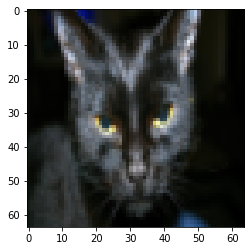

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

index =25
plt.imshow(train_set_x_orig[index])

In [202]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [203]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
Cost after iteration 2000: 0.055824
Cost after iteration 2500: 0.034721
Accuracy Train: 100.0
Accuracy Dev: 74.0


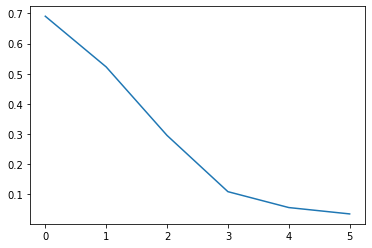

In [21]:
d = nn_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h =10,num_iterations = 3000,learning_rate = 0.01,print_cost = True)
plt.plot(d["costs"])

y = 0.0 model predict non-cat picture


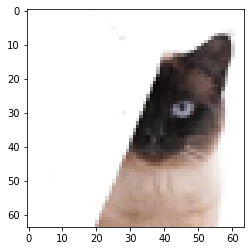

In [62]:
my_image = Image.open('image_cat13.jpg')

x_new  = process_image(my_image,base_size = (64,64))

y_new = predict(d["parameters"],x_new,accept_rate =0.5)

print("y = " + str(np.squeeze(y_new)) + " model predict " + str(classes[int(np.squeeze(y_new)),].decode("utf-8")) + " picture")

In [68]:
hidden_layer_sizes = [5,10,15,20,50,55,60,65]
accuracy_trains_hidden= []
accuracy_tests_hidden = []
for i, n_h in enumerate(hidden_layer_sizes):
    d = nn_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h,num_iterations = 3000,learning_rate = 0.01,print_cost = True)
    accuracy_trains_hidden.append(d["accuracy_train"])
    accuracy_tests_hidden.append(d["accuracy_dev"])

Cost after iteration 0: 0.695465
Cost after iteration 500: 0.511190
Cost after iteration 1000: 0.301722
Cost after iteration 1500: 0.110105
Cost after iteration 2000: 0.056338
Cost after iteration 2500: 0.033368
Accuracy Train: 100.0
Accuracy Dev: 68.0
Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
Cost after iteration 2000: 0.055824
Cost after iteration 2500: 0.034721
Accuracy Train: 100.0
Accuracy Dev: 74.0
Cost after iteration 0: 0.696233
Cost after iteration 500: 0.484045
Cost after iteration 1000: 0.273270
Cost after iteration 1500: 0.090168
Cost after iteration 2000: 0.043259
Cost after iteration 2500: 0.026557
Accuracy Train: 100.0
Accuracy Dev: 68.0
Cost after iteration 0: 0.697734
Cost after iteration 500: 0.444415
Cost after iteration 1000: 0.246152
Cost after iteration 1500: 0.077125
Cost after iteration 2000: 0.038657
Cost after iteration 2500: 0.023729
Accuracy Train: 100.0
Accurac

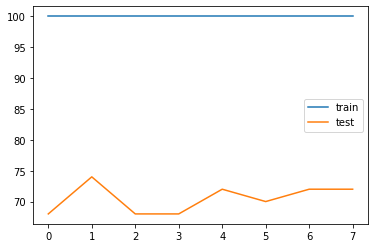

In [76]:
plt.plot(accuracy_trains_hidden,label = "train")
plt.plot(accuracy_tests_hidden,label = "test")
plt.legend()

In [69]:
num_iterations = [500,1000,2000,3000,3500,4000,4500]
accuracy_trains_iteration = []
accuracy_tests_iteration  = []
for i, num_iterations in enumerate(num_iterations):
    d = nn_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h,num_iterations,learning_rate = 0.01,print_cost = True)
    accuracy_trains_iteration.append(d["accuracy_train"])
    accuracy_tests_iteration.append(d["accuracy_dev"])

Cost after iteration 0: 0.691099
Accuracy Train: 88.99521531100478
Accuracy Dev: 68.0
Cost after iteration 0: 0.691099
Cost after iteration 500: 0.358972
Accuracy Train: 92.82296650717703
Accuracy Dev: 80.0
Cost after iteration 0: 0.691099
Cost after iteration 500: 0.358972
Cost after iteration 1000: 0.201192
Cost after iteration 1500: 0.055934
Accuracy Train: 100.0
Accuracy Dev: 72.0
Cost after iteration 0: 0.691099
Cost after iteration 500: 0.358972
Cost after iteration 1000: 0.201192
Cost after iteration 1500: 0.055934
Cost after iteration 2000: 0.028561
Cost after iteration 2500: 0.017763
Accuracy Train: 100.0
Accuracy Dev: 72.0
Cost after iteration 0: 0.691099
Cost after iteration 500: 0.358972
Cost after iteration 1000: 0.201192
Cost after iteration 1500: 0.055934
Cost after iteration 2000: 0.028561
Cost after iteration 2500: 0.017763
Cost after iteration 3000: 0.012422
Accuracy Train: 100.0
Accuracy Dev: 72.0
Cost after iteration 0: 0.691099
Cost after iteration 500: 0.358972
Co

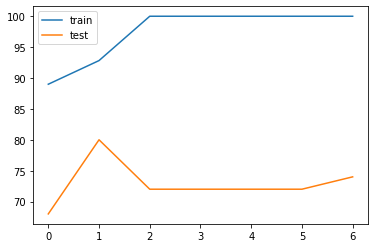

In [75]:
plt.plot(accuracy_trains_iteration,label = "train")
plt.plot(accuracy_tests_iteration,label = "test")
plt.legend()

In [194]:
d = n_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 3000,learning_rate = 0.01,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
Cost after iteration 2000: 0.055824
Cost after iteration 2500: 0.034721
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 50.99019513592785


In [174]:
hidden_layer_sizes = [5,10,15,20]
d = layer_early_stop(train_set_x,train_set_y,test_set_x,test_set_y,hidden_layer_sizes,num_iteration = 3000,learning_rate = 0.01,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.695465
Cost after iteration 500: 0.511190
Cost after iteration 1000: 0.301722
Cost after iteration 1500: 0.110105
Cost after iteration 2000: 0.056338
Cost after iteration 2500: 0.033368
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 56.568542494923804
valid_old:0
valid_now:56.568542494923804
Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
Cost after iteration 2000: 0.055824
Cost after iteration 2500: 0.034721
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 50.99019513592785
valid_old:56.568542494923804
valid_now:50.99019513592785
Cost after iteration 0: 0.696233
Cost after iteration 500: 0.484045
Cost after iteration 1000: 0.273270
Cost after iteration 1500: 0.090168
Cost after iteration 2000: 0.043259
Cost after iteration 2500: 0.026557
High Variance 
More Data and regulazation for hig

In [175]:
d["valid_error"]

50.99019513592785

In [196]:
num_iter = [2000,2500,3000,3500]
d = iteration_early_stop(train_set_x,train_set_y,test_set_x,test_set_y, 10 ,num_iter,learning_rate = 0.01,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 50.99019513592785
valid_old:0
valid_now:50.99019513592785
Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
Cost after iteration 2000: 0.055824
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 50.99019513592785
valid_old:50.99019513592785
valid_now:50.99019513592785
Cost after iteration 0: 0.690876
Cost after iteration 500: 0.522675
Cost after iteration 1000: 0.295285
Cost after iteration 1500: 0.108592
Cost after iteration 2000: 0.055824
Cost after iteration 2500: 0.034721
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 50.99019513592785
valid_old:50.99019513592785
valid_now:50.99019513592

In [197]:
d["valid_error"]

50.99019513592785

In [173]:
def dropout_forward_propagation(params,X,keep_drop = 0.6):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)    
    Z1 = W1 @ X  + b1
    A1 = activation_tanh(Z1)
    
    # Implement Dropout
    # np.random.seed(1)
    D1 = np.random.rand(A1.shape[0],A1.shape[1]) < keep_drop
    A1 = A1 * D1
    #A1 = (1/(keep_drop))* A1 * D1
    #mask = np.random.binomial(1,keep_drop,size = A1.shape)
    #A1 = (1/keep_drop) * np.multiply(A1,mask)
    #A1 =  np.multiply(A1,mask)
    
    Z2 = W2 @ A1 + b2
    A2 = activation_sigmoid(Z2) 
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    assert(A2.shape == (1,X.shape[1]))
    return A2,cache

In [174]:
def dropout_propagate(params,X,Y):
    
    A2,cache = dropout_forward_propagation(params,X,keep_drop = 0.8)
    
    grads = backward_propagation(params,cache,X,Y)
    
    cost = compute_cost(A2,Y)
    
    return grads, cost

In [175]:
def dropout_optimize(params,X,Y,num_iterations,learning_rate,print_cost = False):
    
    costs = []
    
    for i in range(0,num_iterations):
        
        grads,cost = dropout_propagate(params,X,Y)
        
        params = update_parameters(params,grads,learning_rate)
        
        if i % 500 == 0:
            costs.append(cost)
            if print_cost :
                print("Cost after iteration %i: %f" %(i,cost))
    
    return params,grads,costs

In [176]:
def dropout_model(X_train,Y_train,X_dev,Y_dev,n_h,num_iteration = 1000,learning_rate = 0.5,print_cost = False,train_accept = 10,valid_accept = 15,diagnostic = False):

    n_x,n_h,n_y,m = layer_sizes(X_train,Y_train,n_h)
    
    params = initialize_with_parameters(n_x,n_h,n_y,seed = 1)
    
    params, grads, costs = dropout_optimize(params,X_train,Y_train,num_iteration,learning_rate,print_cost)
    
    Y_train_prediction,train_error,Y_test_prediction,valid_error = calc_metrics(X_train,Y_train,X_dev,Y_dev,params,train_accept,valid_accept,diagnostic)
    
    print("train_error: " +str(train_error))
    
    print("valid_error: " +str(valid_error))
    
    d = {"costs"              : costs,
         "train_error"        : train_error,
         "valid_error"        : valid_error,
         "Y_train_prediction" : Y_train_prediction,
         "Y_test_prediction"  : Y_test_prediction,
         "parameters"         : params,
         "learning_rate"      : learning_rate,
         "num_interations"    : num_iteration
          }
        
    return d

In [343]:
#bio + (1/keep_drop)
d1 = dropout_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 5000,learning_rate = 0.5,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.691169
Cost after iteration 500: 0.646214
Cost after iteration 1000: 0.644261
Cost after iteration 1500: 0.644676
Cost after iteration 2000: 0.644643
Cost after iteration 2500: 0.643625
Cost after iteration 3000: 0.645745
Cost after iteration 3500: 0.645847
Cost after iteration 4000: 0.642131
Cost after iteration 4500: 0.645430
High Variance and High Bias
More Data and regulazation for high variance
Bigger Network
train_error: 58.693918565342216
valid_error: 81.24038404635961


In [349]:
#bio 
d2 = dropout_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 5000,learning_rate = 0.5,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.691636
Cost after iteration 500: 0.644486
Cost after iteration 1000: 0.644261
Cost after iteration 1500: 0.644360
Cost after iteration 2000: 0.644763
Cost after iteration 2500: 0.643387
Cost after iteration 3000: 0.645280
Cost after iteration 3500: 0.645588
Cost after iteration 4000: 0.642587
Cost after iteration 4500: 0.645049
High Variance and High Bias
More Data and regulazation for high variance
Bigger Network
train_error: 58.693918565342216
valid_error: 81.24038404635961


In [354]:
# Andrew + (1/keep_drop)
d3 = dropout_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 5000,learning_rate = 0.5,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.691169
Cost after iteration 500: 0.646214
Cost after iteration 1000: 0.644261
Cost after iteration 1500: 0.644676
Cost after iteration 2000: 0.644643
Cost after iteration 2500: 0.643625
Cost after iteration 3000: 0.645745
Cost after iteration 3500: 0.645847
Cost after iteration 4000: 0.642131
Cost after iteration 4500: 0.645430
High Variance and High Bias
More Data and regulazation for high variance
Bigger Network
train_error: 58.693918565342216
valid_error: 81.24038404635961


In [359]:
# Andrew 
d4 = dropout_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 5000,learning_rate = 0.5,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.691636
Cost after iteration 500: 0.644486
Cost after iteration 1000: 0.644261
Cost after iteration 1500: 0.644360
Cost after iteration 2000: 0.644763
Cost after iteration 2500: 0.643387
Cost after iteration 3000: 0.645280
Cost after iteration 3500: 0.645588
Cost after iteration 4000: 0.642587
Cost after iteration 4500: 0.645049
High Variance and High Bias
More Data and regulazation for high variance
Bigger Network
train_error: 58.693918565342216
valid_error: 81.24038404635961


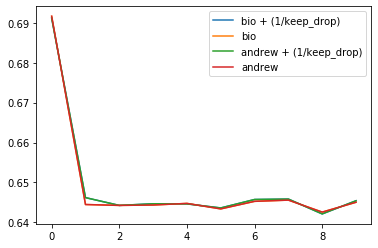

In [364]:
cost1 = d1["costs"]
cost2 = d2["costs"]
cost3 = d3["costs"]
cost4 = d4["costs"]
plt.plot(cost1,label = "bio + (1/keep_drop)")
plt.plot(cost2,label = "bio")
plt.plot(cost3,label = "andrew + (1/keep_drop)")
plt.plot(cost4,label = "andrew")
plt.legend()

In [261]:
# L2
def wdecay_compute_cost(a,Y,W1,W2,lambd):
    m = Y.shape[1]
    cost = -(Y * np.log(a) + (1 - Y) * np.log(1-a))
    cost = np.mean(cost)
    cost_w = cost + lambd/(2*m) * np.linalg.norm(W1)**2 + lambd/(2*m) * np.linalg.norm(W2)**2
    return cost,cost_w

In [262]:
def wdecay_model(X_train,Y_train,X_dev,Y_dev,n_h,num_iterations = 10000\
                 ,learning_rate = 0.5,print_cost = False,lambd = 0.1,train_accept = 10,valid_accept = 15,diagnostic = True):

    n_x,n_h,n_y,m = layer_sizes(X_train,Y_train,n_h)
    
    params = initialize_with_parameters(n_x,n_h,n_y,seed = 1)
    
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    #params, grads, costs,costs_w = wdecay_optimize(params,X_train,Y_train,num_iterations,learning_rate,lambd,print_cost)    
    
    costs   = []
    costs_w = []
    
    for i in range(0,num_iterations):
        
    #grads,cost,cost_w = wdecay_propagate(params,X,Y,lambd)
        
        #A2,cache = forward_propagation(params,X)
        
        Z1 = W1 @ X_train  + b1
        A1 = activation_tanh(Z1)
        Z2 = W2 @ A1 + b2
        A2 = activation_sigmoid(Z2) 
        
        #grads = wdecay_backward_propagation(params,cache,X,Y,lambd)
        
        dZ2 = A2 - Y_train        
        dW2 = 1/m * (dZ2 @ A1.T)
        dLdW2 = dW2 + lambd/m * W2
        db2 = 1/m * np.sum(dZ2,axis =1,keepdims = True)
        dZ1 = np.matmul(W2.T,dZ2) * (1 - np.power(A1,2))
        dW1 = 1/m * (dZ1 @ X_train.T)
        dLdW1 = dW1 + lambd/m * W1
        db1 = 1/m * np.sum(dZ1,axis =1,keepdims = True)
        
        #params     = wdecay_update_parameters(params,grads,learning_rate,lambd,m)
        
        W1 = W1 - learning_rate *dLdW1
        #W1 = W1*(1-lambd*learning_rate) - learning_rate*dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate *dLdW2
        #W2 = W2*(1-lambd*learning_rate) - learning_rate*dW2
        b2 = b2 - learning_rate * db2
        
        cost,cost_w =  wdecay_compute_cost(A2,Y_train,W1,W2,lambd)
        
        if i % 500 == 0:
            costs.append(cost)
            costs_w.append(cost_w)
            if print_cost :
                print("Cost after iteration %i: %f" %(i,cost))
                print("Cost_w after iteration %i: %f" %(i,cost_w))
                
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    Y_train_prediction,train_error,Y_test_prediction,valid_error = calc_metrics(X_train,Y_train,X_dev,Y_dev,params,train_accept,valid_accept,diagnostic)
    

    print("train_error: " +str(train_error))
    
    print("valid_error: " +str(valid_error))
    
    #print("dW1:" +str(dW1.shape))
    #print("dLdW1:" +str(dLdW1.shape))
    #print("dW2:" +str(dW2.shape))
    #print("dLdW2:" +str(dLdW2.shape))
    
    d = {"costs"              : costs,
         "costs_w"            : costs_w,
         "train_error"        : train_error,
         "valid_error"        : valid_error,
         "Y_train_prediction" : Y_train_prediction,
         "Y_test_prediction"  : Y_test_prediction,
         "parameters"         : params,
         "learning_rate"      : learning_rate,
         "num_interations"    : num_iterations
          }
        
    return d

In [263]:
d1 = wdecay_model(train_set_x,train_set_y,test_set_x,test_set_y,\
                  n_h=10,num_iterations = 3000,learning_rate = 0.05,\
                  print_cost = True,lambd = 0.001,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.690876
Cost_w after iteration 0: 0.690905
Cost after iteration 500: 0.259124
Cost_w after iteration 500: 0.259175
Cost after iteration 1000: 0.065381
Cost_w after iteration 1000: 0.065459
Cost after iteration 1500: 0.277977
Cost_w after iteration 1500: 0.278081
Cost after iteration 2000: 0.119171
Cost_w after iteration 2000: 0.119304
Cost after iteration 2500: 0.053769
Cost_w after iteration 2500: 0.053920
High Variance 
More Data and regulazation for high variance
train_error: 6.917144638660747
valid_error: 50.99019513592785


In [264]:
d2 = n_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 3000,\
             learning_rate = 0.05,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.690876
Cost after iteration 500: 0.254801
Cost after iteration 1000: 0.042519
Cost after iteration 1500: 0.021784
Cost after iteration 2000: 0.013969
Cost after iteration 2500: 0.009941
High Variance 
More Data and regulazation for high variance
train_error: 0.0
valid_error: 46.9041575982343


In [265]:
d3 = dropout_model(train_set_x,train_set_y,test_set_x,test_set_y,n_h = 10,num_iteration = 3000,\
                   learning_rate = 0.05,print_cost = True,train_accept = 10,valid_accept = 15,diagnostic = True)

Cost after iteration 0: 0.691636
Cost after iteration 500: 0.560147
Cost after iteration 1000: 0.672336
Cost after iteration 1500: 0.643702
Cost after iteration 2000: 0.648261
Cost after iteration 2500: 0.645480
High Variance and High Bias
More Data and regulazation for high variance
Bigger Network
train_error: 58.693918565342216
valid_error: 81.24038404635961


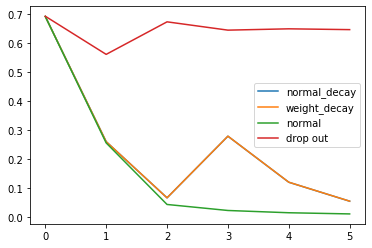

In [266]:
cost1 = d1["costs"]
plt.plot(cost1,label = "normal_decay")

cost2 = d1["costs_w"]
plt.plot(cost2,label = "weight_decay")

cost3 = d2["costs"]
plt.plot(cost3,label = "normal")

cost4 = d3["costs"]
plt.plot(cost4,label = "drop out")

plt.legend()